# Imports

In [1]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import base64
import inspect

from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_confusion_matrix
from xgboost import XGBClassifier
from dash.dependencies import Input, Output
from wordcloud import WordCloud
from PIL import Image
from os import path
from jupyter_plotly_dash import JupyterDash
from importlib import reload

Using TensorFlow backend.


```
def format_titles(title_list):
    """This function formats the movie titles in such a way that they can be
    discerned by the web site where the screenplays will be taken from.
    
    Parameter:
    
        title_list: list
        list of titles to be formatted, generally from metacritic.
        
    Returns: 
    
        list containing titles in the proper format for scraping screenplays from
        springfieldspringfield.co.uk."""
    
    # Initializing list for later
    titles_formatted = []
    
    # Will cycle through all titles and leave them in the correct format for
    # later use.
    for title in title_list:
        title = title.lower()
        
        # Titles on this site have ', the' at the end.
        if title[:3] == 'the':
            title = title[4:] + ', the'
        
        # Getting rid of punctuation that wouldn't be in the url.
        punctuations = """!()-[]{};:'"\,<>./?@#$%^&*~"""
        for x in title: 
            if x in punctuations: 
                title = title.replace(x, '')
        
        # In the url, the spaces are hyphens.
        for x in title:
            title = title.replace('  ', '-')
            title = title.replace(' ', '-')
            title = title.replace('_', '-')
            
        titles_formatted.append(title)

    return titles_formatted
```

In [2]:
import functions as fun

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
rotten_df_cut = pd.read_csv('project_resources/rotten_df_cut.csv', index_col=0)
screenplays_cut = pd.read_csv('project_resources/screenplays_cut.csv', index_col=0)

# Visuals

These visuals will be assembled for the purpose of the project dashboard, which will be run on an html page, ultimately to be hosted publicly. 

## Word Clouds

Separating out the good movies from the bad and finding the most frequently used words.

In [9]:
# Creating dataframes for good and bad movies, then getting the top words.
good_movies_nostop = screenplays_cut[
    screenplays_cut.good_or_bad == 1]['no_stop']

good_top_words = fun.top_words(words=good_movies_nostop, max_features=5000, 
          min_df=.2, max_df=1.0)

bad_movies_nostop = screenplays_cut[
    screenplays_cut.good_or_bad == 0]['no_stop']

bad_top_words = fun.top_words(words=bad_movies_nostop, max_features=5000, 
          min_df=.2, max_df=1.0)

# Creating list to separate words from tuples
just_bad_words = [wordpair[0] for wordpair in bad_top_words]

good_not_bad = [(wordpair[0], wordpair[1]) for wordpair in good_top_words
                if wordpair[0] not in just_bad_words]

good_not_bad

[('president', 1.222488038277512),
 ('film', 1.1754385964912282),
 ('la', 0.9792663476874003),
 ('general', 0.9577352472089314),
 ('18', 0.9043062200956937),
 ('government', 0.8875598086124402),
 ('16', 0.8046251993620415),
 ('17', 0.7910685805422647),
 ('500', 0.766347687400319),
 ('chief', 0.7639553429027113),
 ('bloody', 0.7304625199362041),
 ('ought', 0.7256778309409888),
 ('tea', 0.7192982456140351),
 ('24', 0.7169059011164274),
 ('united', 0.6507177033492823),
 ('river', 0.6467304625199362),
 ('states', 0.6347687400318979),
 ('200', 0.5629984051036683),
 ('stage', 0.5598086124401914),
 ('guilty', 0.5470494417862839),
 ('brown', 0.5358851674641149),
 ('papers', 0.507177033492823),
 ('pray', 0.4944178628389155),
 ('fellow', 0.48883572567783096),
 ('memory', 0.48325358851674644),
 ('teacher', 0.47527910685805425),
 ('streets', 0.47208931419457734),
 ('began', 0.4696969696969697),
 ('study', 0.46411483253588515),
 ('interest', 0.4625199362041467),
 ('orders', 0.46172248803827753),
 (

I'm going to get the top words from bad and good that are exclusive from the other side. So, only the top good words than are not in the bad films, and for the bad film list, only the top words that are not in the good film list.

In [10]:
# Creating list to separate words from tuples
just_good_words = [wordpair[0] for wordpair in good_top_words]

bad_not_good = [(wordpair[0], wordpair[1]) for wordpair in bad_top_words
                if wordpair[0] not in just_good_words]

bad_not_good

[('dude', 1.602280348759222),
 ('yo', 1.3313212608987257),
 ('whoo', 1.017437961099933),
 ('ow', 1.010731052984574),
 ('cop', 0.8048289738430584),
 ('agent', 0.778001341381623),
 ('mommy', 0.7518443997317237),
 ('sweetie', 0.681421864520456),
 ('cell', 0.6794097920858484),
 ('outta', 0.6606304493628438),
 ('awesome', 0.6264252179745138),
 ('video', 0.6130114017437961),
 ('balls', 0.5928906773977196),
 ('engine', 0.5774647887323944),
 ('killer', 0.5620389000670691),
 ('computer', 0.5472837022132797),
 ('flight', 0.5258215962441315),
 ('magic', 0.5238095238095238),
 ('babe', 0.5083836351441985),
 ('nuts', 0.500335345405768),
 ('freak', 0.4869215291750503),
 ('code', 0.4768611670020121),
 ('super', 0.47283702213279677),
 ('aw', 0.4708249496981891),
 ('games', 0.4681421864520456),
 ('drugs', 0.46680080482897385),
 ('suck', 0.460093896713615),
 ('ex', 0.4540576794097921),
 ('butt', 0.443326626425218),
 ('bucks', 0.4413145539906103),
 ('weapon', 0.42521797451374915),
 ('gosh', 0.424547283702

To get this information into a word cloud, I'm actually going to de-tokenize the words and put them all in a string.

In [11]:
good_string = ''

for wordpair in good_not_bad:
    mul = wordpair[1] * 20
    word_rep = (wordpair[0] + ' the ')*int(mul)
    good_string += word_rep

Using image masks found from http://www.clker.com/.

In [12]:
thumbs_down_mask = np.array(Image.open('images/thumbs-dwn-icon-black-th.svg.hi.png'))
thumbs_up_mask = np.array(Image.open('images/thumbs-up-icon-black-hi.png'))

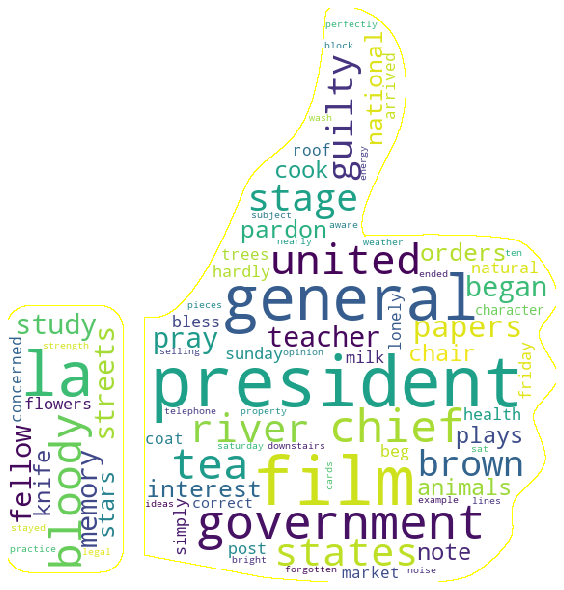

In [13]:
wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10,
                      background_color='white',
                      collocations=False,
                      mask=thumbs_up_mask,
                      contour_width=1,
                      contour_color='yellow').generate(good_string)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('images/good_cloud.png')
plt.show()

Same code used for the thumbs down word cloud for the bad films.

In [14]:
bad_string = ''

for wordpair in bad_not_good:
    # 20 is an arbitrary number; just need something to break them apart.
    mul = wordpair[1] * 20
    word_rep = (wordpair[0] + ' the ')*int(mul)
    bad_string += word_rep

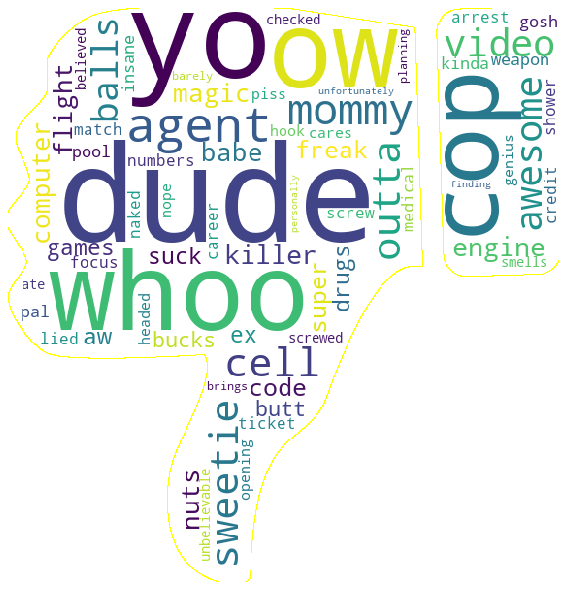

In [15]:
wordcloud = WordCloud(width=800, height=800, 
                      min_font_size=10,
                      background_color='white',
                      collocations=False,
                      mask=thumbs_down_mask,
                      contour_width=1,
                      contour_color='yellow').generate(bad_string)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('images/bad_cloud.png')
plt.show()

Some definite patterns emerge.

# Dashboard

## POS Histogram

For the histogram/distplot dropdown, I'll need to create materials to tell the dashboard what to show and options to choose from.

Note that the actual code for the graph has been moved below so that it can appear in the dash callback.

In [167]:
POS_abb = screenplays_cut.columns[list(screenplays_cut.columns).index(
    'word_count'):
                                  list(screenplays_cut.columns).index(
                                      'sentence_length')+1]
POS_abb = POS_abb.append(screenplays_cut.columns[list(screenplays_cut.columns).index(
    'PROPN'):
                                   list(screenplays_cut.columns).index(
                                       'PRON')+1])

# Removing items that just weren't helpful.
POS_abb = list(POS_abb)
POS_abb.remove('sentiment_scores')
POS_abb.remove('sentiment_compound')
POS_abb.remove('colon_ratios')
POS_abb.remove('semi_ratios')
POS_abb.remove('SYM')
POS_abb.remove('X')
POS_abb.remove('SPACE')

In [168]:
# List of items to include in the dropdown. Even though I refer to the list
# as POS, there are a few more attributes than just parts of speech.
POS_desc = ['WORD COUNT', 'UNIQUE WORDS', 'NEGATIVE SENTIMENT', 
            'NEUTRAL SENTIMENT', 'POSITIVE SENTIMENT',
            'COMMAS', 'ELLIPSES', 'SENTENCE LENGTH',
            'PROPER NOUN', 'PUNCTUATION', 'SYMBOL', 'VERB', 'OTHER',
            'SPACE', 'ADJECTIVE', 'ADPOSITION', 'ADVERB', 
            'AUXILLIARY', 'COORDINATING CONJUNCTION', 'DETERMINER',
            'INTERJECTION', 'NOUN', 'NUMERICAL', 'PARTICIPLE',
            'PRONOUN']

# This will marry the label (viewer-facing) to the value (data-facing).
POS_hist_dict = dict(zip(POS_abb, POS_desc))

# This will Put everything into its final format needed by dash.
POS_hist_selector_list = []

for k,v in POS_hist_dict.items():
    temp = dict()
    temp['label'] = v
    temp['value'] = k
    POS_hist_selector_list.append(temp)

## Correlation Graph

Using XG Boost model to create feature importances to graph later on.

In [169]:
# The usual classification setup. I won't need test sets since all I'm looking
# for is the feature importance, and not the actual scoring or predictions.

X_train = screenplays_cut.no_stop
y_train = screenplays_cut.good_or_bad

# This will be the TFIDF version of the classification, since it was the most
# accurate.
tfidf = TfidfVectorizer(max_df=.95, min_df=.1, max_features=5000,
                         ngram_range=(1,2))
X2 = tfidf.fit_transform(X_train)

# There a few more bad scripts than good ones, so I'll make them even.
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(pd.DataFrame(X2), y_train)

clf = XGBClassifier(max_depth=8,
                    criterion='entropy',
                    min_samples_split=14,
                    min_samples_leaf=1,
                    max_features=160)

clf.fit(X2, y_train)

columns = tfidf.get_feature_names()

# Printing and plotting.
print(pd.Series(clf.feature_importances_,
              index=columns).sort_values(ascending=False).head(15))
df_importance = pd.Series(clf.feature_importances_, 
                          index=columns)
df_importance = df_importance.sort_values(ascending=True).tail(60)
# df_importance.plot(kind='barh', figsize=(8,15))
# plt.title('Most Important Features')
# plt.ylabel('Feature Name')
# plt.xlabel('Feature Importance')
plt.show()

hey          0.009930
alive        0.003899
fuck it      0.003676
how going    0.003661
cat          0.003245
coat         0.003184
need help    0.002784
trust me     0.002781
oh god       0.002777
happy you    0.002714
out we       0.002694
sound        0.002683
wine         0.002604
suppose      0.002511
saturday     0.002471
dtype: float32


Once I have the impoirtant features, I'll sort them and marry them up to a correlation matrix so that I can show how much the goood and bad movies are correlated to each top feature (word).

In [170]:
df_importance.sort_values(ascending=False, inplace=True)

important_df = pd.SparseDataFrame(X2, columns=tfidf.get_feature_names(),
                               default_fill_value=0 )

important_df = important_df[list(df_importance.index)]
important_df['good_or_bad'] = y_train

important_corr = important_df.corr()

In [171]:
# I have to get rid of the rating column itself since it's not part of the 
# actual word list.
feature_corr = important_corr.good_or_bad.drop('good_or_bad', axis=0)

# Then separate out the good and the bad.
good_corr = important_corr[important_corr['good_or_bad'] > 0]['good_or_bad']
bad_corr = important_corr[important_corr['good_or_bad'] <= 0]['good_or_bad']

# Putting it all together
for i,v in bad_corr.items():
    value = v + abs(v*2)
    bad_corr.set_value(i,value) 
features_for_graph = pd.DataFrame([feature_corr, good_corr, bad_corr], 
                                  columns=['features', 'awesome', 'awful'])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



Creating the information that the dash will need to toggle the 3 bar graphs.

In [172]:
features_for_graph = {'features':df_importance, 'awesome':good_corr,
                          'awful':bad_corr}

features_for_graph = pd.DataFrame.from_dict(features_for_graph)
#     .drop('good_or_bad', axis=0)

# Carving out the class column.
# good_corr = good_corr.drop('good_or_bad')
# bad_corr = bad_corr.drop('good_or_bad')

Test graphic

In [173]:
data = go.Bar(x=bad_corr, y=bad_corr.index, orientation='h', 
              marker={'color':'rgba(250, 250, 0, .5)',
                                 'line':{'color':'rgba(0,0,0,1)',
                                         'width':1}})
layout = go.Layout(width=400, height=600, yaxis={'autorange':"reversed"})

fig = go.Figure(data, layout)

fig.show()

Creating the bar charts that will show the top 25 words of their respective type.

In [207]:
# Need to wipe out a few naughty words.
df_importance = df_importance[:25]
indi = list(df_importance.index)
for index, word in enumerate(indi):
    if word.find('fuck') >= 0:
        indi[index] = word.replace('fuck','f**k')
df_importance.index = indi

good_corr = good_corr[:25]
indi = list(good_corr.index)
for index, word in enumerate(indi):
    if word.find('fuck') >= 0:
        indi[index] = word.replace('fuck','f**k')
good_corr.index = indi

bad_corr = bad_corr[:25]
indi = list(bad_corr.index)
for index, word in enumerate(indi):
    if word.find('fuck') >= 0:
        indi[index] = word.replace('fuck','f**k')
bad_corr.index = indi

# for index, word in df_importance.items():
#     print(index)
#     if index.find('fuck') >= 0:
#         df_importance.index[index] = 'f**k'

# These are for the html.radio element.
feature_selector_dicts = [{'label': 'Word Importance', 'value': 'df_importance'},
                          {'label': 'Awesome Film Words', 'value': 'good_corr'},
                          {'label': 'Awful Film Words', 'value': 'bad_corr'}]

# These are to line up the data inside the function.
feature_selector_data = {'df_importance': df_importance, 'good_corr': good_corr,
                         'bad_corr': bad_corr}

# This will assign different colors to the different graphs.
feature_color_dicts = {'df_importance': 'rgba(250, 250, 0, .5)',
                       'good_corr': 'rgba(35,220,90,.75)',
                       'bad_corr': 'rgba(35,0,75,.5)'}

In [208]:
type(good_corr)

pandas.core.sparse.series.SparseSeries

## Unsupervised Category Predictions

In the EDA section, I used latent derichlet allocation to draw categories from the text and group the movies by those categories. I used ten categories because that's what worked well for modeling, but any number could actually be specified. I'll be showing them on the dashboard now, and allowing the user to select between the category to see what movies are in them.

In [255]:
# Bringing in the data from the other notebook that I'll need for this.
combined_df = pd.read_csv('../project_resources/combined_df.csv', index_col=0)
cat_word_df = pd.read_csv('../project_resources/cat_word_df.csv', index_col=0)

In [256]:
# Since these need to be in a different format from the work I've already done
# on the lda categories, I simply re-pasted them into these dictionaries.
lda_cats = [{'label':'Dark & Political', 'value':0,},
            {'label':'Sports, Comedy, Silly Horror', 'value':1},
            {'label':'Conflict', 'value':2},
            {'label':'Holiday, Films I Haven\'t Seen', 'value':3},
            {'label':'Light-Hearted', 'value':4},
            {'label':'Unusual Language or Slang', 'value':5},
            {'label':'Violence & Gangster', 'value':6},
            {'label':'Romance & Light Drama', 'value':7},
            {'label':'Life Stories', 'value':8},
            {'label':'Straight Up Horror', 'value':9}]

In [257]:
for col in cat_word_df.columns:
    cat_word_df[col] = cat_word_df[col].str.replace('fuck', 'f**k')
    cat_word_df[col] = cat_word_df[col].str.replace('bitch', 'b**ch')
    cat_word_df[col] = cat_word_df[col].str.replace('ass', 'a**')

## Dashboard Text

This is all the text that will be used in the body of the dashboard itself.

In [293]:
intro_text = """The film industry worldwide does upwards of 50 billion dollars 
    in box office sales, not counting home entertainment revenue, which brings 
    it up closer to 150 billion dollars. Operating within that brick of cash 
    comes with a tremendous amount of risk, with major studios 
    sometimes spending a quarter of a billion dollars or more on a single film. 
    Decisions made at smaller studios are no less important to them, as they 
    might be putting their entire livelihoods on the line in the hopes of a hit. 
    And the value of a movie begins with a script."""

intro_text_2 = """Here is a look at some of the many factors that might 
    separate a highly-rated screenplay from one that's been critically panned.
    Over a thousand examples of each were used to create the below results."""

thumb_text = """Below is a breakout of the most common words among highly 
    rated films and lowly rated films. Only words that are unique were chosen,
    so that for example, the word 'dude', while prominent in bad films, appeared 
    rarely if at all in good ones. Before you ask, I'm assuming The Big 
    Lebowski was not included in the sample."""

thumb_text_2 = """If you're attempting to write a screenplay and you find 
    yourself using a lot of the words on the right, you might think about 
    taking another writing class or two before continuing on. Either that,
    or set aside your idea for Cop Dude Killer for a day when the public is more 
    ready for it."""

hist_text = """Moving on to breaking up the scripts into their component parts, 
    below is a selelctable series of distribution plots showing various 
    attributes such as word count and sentence length, as well as parts of 
    speech. All of these attributes can be used when creating predictive models 
    to predicit if a screenplay will be well-received or not."""

hist_text_2 = """The differences for each may seem slight, but in accumulation during 
    modeling, they can assist with overall prediction."""

importance_text = """Over to the left you'll see the words that featured
    most prominently in creating a predictive model to determine if a 
    movie would be rated high or low. The initial view indicates how significant
    those words were in making that prediction, with the most important words
    listed higher and on down in descending order. These are then broken out
    by good movies and bad movies, with the length of the bars representing 
    the correlation of that word to the screenplays, still in descending
    order of importance in making predictions."""

category_text = """Using latent Derichlet Allocation, the screenplays from
    metacritic were grouped according to their linguistic characteristics.
    Sometimes, these lined up with a particular genre, and sometimes not.
    After reviewing the titles, I labeled the categories as something that
    I thought best captured the bulk of the movies, but it wasn't always a 
    perfect grouping, noting to the right the selecting of Baby Geniuses among
    films such as The Murder Of Nicole Brown Simpson and Feardotcom.
    Or is it so different after all? Something brought them together here..."""

summary_text = """Using the above attributes and more, I was able to create
    a predictive models that would ascertain whether a script was from a 
    top-rated movie or a bottom-rated movie about 65% of the time. Within
    that models was some flexibility, however. Some models were better at 
    predicting whether a movie would be 'good' (a true positive), while others
    were better at predicting whether a movie would be 'bad' (a true negative). 
    The purpose of the prediction would dictate which model to employ."""

# summary_text_2 = """All together, this modeling can lead a studio to sort 
#     potential screenplays into lists of scripts with higher likelihood of 
#     success, using modeling to evaluate scripts in process and step back to 
#     consider if it needs more work if the model doesn't like it, and for the 
#     screenwriters themselves, to check their scripts against the model and if 
#     it comes back with a 'bad' rating, potentially rethink their life choices.
#     """

# summary_text_3 = """For further research, I would to create a text 
#     ingestion field and/or upload in the dashboard that allows a user to 
#     insert a body of text and have a prediction returned evaluating the 
#     content and assigning a good or bad designation (if the text were a 
#     screenplay). I would create predictability functionality that would allow 
#     a user to choose a 'good' or 'bad' setting and have automatically 
#     generated text returned back in the style of either a good or bad 
#     script. And I would go deeper into the neural networds when modeling, 
#     especially toward regression. They showed promise when using them in this 
#     project, but there was insufficient time to build them out using pre-made 
#     embedding layers and so on."""

summary_recommendations_head = html.P("""Some recommendations on what can be 
    done with this information: """)

summary_recommendations = html.Li(children=["""Studios looking to cull out 
    poor scripts from their stock should use the TFIDF with neural network
    model, which has an 81% rating for correctly predicting a bad scripts,
    and a 64% accuracy rating overall."""])
    
summary_recommendations_2 = html.Li(children=["""
    Filmmakers looking create the largest set of good scripts from the total
    should use the random boost with script attributes model, 
    which has a 69% chance of correctly predicting a good script,
    though only a 55% accuracy score overall."""])

summary_recommendations_3 = html.Li(children=["""
    Filmmakers and screenwriters looking to find the most balanced filter
    for finding good screenplays and culling out the bad should look to the
    stacked model with support vector classifier using TFIDF followed by 
    a random forest classifier using script attributes, which had the 
    highest overall accuracy rate of 68%. If you're a screenwriter seeing 
    your work coming up on the bad side, and especially if it contains a 
    number of the "thumbs down" words noted above, you might want to start 
    rethinking your life choices."""])

summary_future_head = html.P("""The scope of this idea is large, and 
    there are numerous opportunities for further study. A few I would like to
    puruse are: """)

summary_future = html.Li(
    ["""Using TFIDF on the word clouds to get 
    a different, possibly more accurate take on what words are realistically
    more prevalent throughout a large body of texts."""])

summary_future_2 = html.Li([ 
    """Continue modeling with neural networks, especially with GloVe or other
    existing word embedding libraries."""])

summary_future_3= html.Li([
    """Continue further work on regression analysis to predict  no just 
    whether a scripts is good or bad, but to predict the actual score it will
    receive on a scale of 0 to 100."""])

summary_future_4 = html.Li([
    """In the dashboard, provide a text entry or upload option where a script
    could be entered and a 'good' or 'bad' rating could be assigned, to 
    easily determine where a given script might lie."""])

footer = """Analysis and Dashboard by: Terry Ollila, terryollila@gmail.com"""

## Main Dash Code

This is the skeleton for the web page for the dashboard. Interactions will be managed by callbacks, and styles will be managed by a separate style sheet: main.css in the assets folder.

In [319]:
# app = JupyterDash('POS_histogram')
app = dash.Dash()

# Reading in the files for the word cloud images.
image_filename = 'images/good_cloud.png'
encoded_good_cloud = base64.b64encode(
    open(image_filename, 'rb').read()).decode('ascii')

image_filename = 'images/bad_cloud.png'
encoded_bad_cloud = base64.b64encode(
    open(image_filename, 'rb').read()).decode('ascii')

# The main block of code generating the HTML. Using separate file for 
# CSS styling.
app.layout = html.Div(children=[
    html.H1(className='head',
            children=['What\'s a', html.Br(), 'Writer Worth?']
           ),
    html.H2(className='subHead',
            children=["""Screenplay Science and 
                the Value of a Few Good Words"""]
           ),
    html.Div(className='mainBox',
             children=[
        html.Div(className='subBox',
                 children=[
                     
            #Introductory text         
            html.Div(
                className='textBlock',
                children=[
                    html.P(intro_text),
                    html.P(intro_text_2)
                ]),
            html.H3('Unique Words'),
                     
            html.Div(
                className='textBlock',
                children=[
                    html.P(thumb_text)
                ]),
            
            # This is where the word clouds will go.
            html.Div(className='thumbBoxLeft',
                     children=[
                html.Img(className='thumbs',
                     src='data:image/png;base64,{}'.format(encoded_good_cloud)
                     ),
                html.Div(className='thumbDesc',
                    children=['The Good']),
                 ]),
            html.Div(className='thumbBoxRight',
                     children=[
                html.Div(className='thumbDesc',
                          children=['The Bad']),
                html.Img(className='thumbs',
                         src='data:image/png;base64,{}'.format(encoded_bad_cloud)
                        )
                 ]),
            html.Div(
                className='textBlock',
                children=[
                    html.P(thumb_text_2)
                ]),
            html.H3('Structure and Parts of Speech'),
            html.Div(
                className='textBlock',
                children=[
                    html.P(hist_text),
                ]),                    
                     
            # This is where the histogram will go in from the callback.
            html.Div(id='hist', children=[
                dcc.Dropdown(id='hist_selector',
                         options=POS_hist_selector_list,
                         value='word_count'),
                dcc.Graph(
                    id='hist_graph')
                ]),
            html.Div(className='textBlock',
                     children=[
                 html.P(hist_text_2)
                ]),
            html.H3('Word Importance'),
            dcc.RadioItems(
                id='feature_radio',
                options=feature_selector_dicts,
                value='df_importance'),
            dcc.Graph(
                id='feature_graph'),
            html.P(
                className='sidebar',
                children=[importance_text]),
                     
            # This is where we will show the LDA category information.
            html.H3('Unsupervised Category Creation'),
            html.Div(
                id='cat_div',
                children=[
                    dcc.Dropdown(id='cat_drop',
                                 options=lda_cats,
                                 value=0),
                    html.Div(id='cat_box'),
                    html.Div(id='cat_box_2'),
                ]),
            html.P(className='sidebar',
                   children=[category_text]),
            html.H3('It\'s a Wrap'),
            html.P(className='sidebar',
                   children=[summary_text]),
#             html.P(className='sidebar',
#                    children=[summary_text_2]),
#             html.P(className='sidebar',
#                    children=[summary_text_3]),
            html.P(className='sidebar',
                   children=[summary_recommendations_head]),
            html.Ul(className='sidebar',
                   children=[summary_recommendations,
                             summary_recommendations_2,
                             summary_recommendations_3
                            ]),
            html.P(className='sidebar',
                   children=[summary_future_head]),
            html.Ul(className='sidebar',
                   children=[summary_future,
                             summary_future_2,
                             summary_future_3,
                             summary_future_4]),
            html.P(className='sidebar',
                   children=[footer]),
            ]),
        ]),         
    ])

## Callbacks

The distplot will select between a number of different script attributes.

In [320]:
# Callback and function for POS graphs and switching dropdown.
@app.callback(Output(component_id='hist_graph', 
                     component_property='figure'),
              [Input(component_id='hist_selector',
                     component_property='value')])
def insert_hist(POS_label):
    
    # Separating out the good from the bad.
    data1 = screenplays_cut[screenplays_cut.good_or_bad == 1]\
    [POS_label]
    
    data0 = screenplays_cut[screenplays_cut.good_or_bad == 0]\
    [POS_label]
    
    # Creating a cutoff at 3 standard deviations so that the graphs don't get 
    # skewed to one side.
    std_high_1 = data1.mean() \
        + data1.std()*3
    std_low_1 = data1.mean() \
        - data1.std()*3
    
    plot_info_1 = data1.drop(data1[lambda x: x > std_high_1].index)
    plot_info_1 = plot_info_1.drop(plot_info_1[lambda x: x < std_low_1].index)
    
    # Same thing for the bad scripts.
    std_high_0 = data0.mean() \
        + data0.std()*3
    std_low_0 = data0.mean() \
        - data0.std()*3
    
    plot_info_0 = data0.drop(data0[lambda x: x > std_high_0].index)
    plot_info_0 = plot_info_0.drop(plot_info_0[lambda x: x < std_low_0].index)
    
    # I need to create different bin sizes for various plots, since there is
    # such a variety of scales here.
    bin_size=0
    
    if plot_info_1.mean() > 500:
        bin_size = 100
    elif plot_info_1.mean() > 1:
        bin_size = .1
    elif plot_info_1.mean() > .1:
        bin_size = .005
    elif plot_info_1.mean() > .01:
        bin_size = .001
    else:
        bin_size = .0004

    fig =  ff.create_distplot([plot_info_1, plot_info_0], 
                              bin_size=bin_size,
                              group_labels=['Awesome Films', 'Awful Films'],
                              colors=['rgb(255,20,20)', 'rgb(35,230,90)'],
                              )
    fig.layout.update(title='Screenplay Metrics',
                      yaxis={'title':'Frequency'})
    
    return fig
                    

This will create the important word bar graph that will toggle between most important words overall, good film word correlation, and bad film word correlation.

In [321]:
#Callback and function for feature bar graph and radio buttons.
@app.callback(Output(component_id='feature_graph', 
                     component_property='figure'),
              [Input(component_id='feature_radio',
                     component_property='value')])
def insert_feature(radio_label):
    bar_data = [
        go.Bar(
            x=feature_selector_data[radio_label], 
            y=feature_selector_data[radio_label].index, 
            orientation='h', 
            marker={'color': feature_color_dicts[radio_label],
                     'line':{'color':'rgba(150,10,10,1)',
                             'width':1}})]
    toggle={'df_importance':'Important Overall',
            'good_corr':'Awesome Films',
            'bad_corr':'Awful Films'}
    
    imp_corr = 'Importance' if radio_label == 'df_importance' else 'Correlation'

    bar_layout = go.Layout(width=400, height=700, 
                           title=toggle[radio_label],
                           xaxis={'title':imp_corr},
                           yaxis={'autorange':"reversed",
                                  'title':'Significant Words'})

    return {'data':bar_data, 'layout':bar_layout}

This will create the box for displaying titles associated with the categories created using LDA.

In [322]:
# Callback and function for movies grouped by LDA categories.
@app.callback(Output(component_id='cat_box', 
                     component_property='children'),
              [Input(component_id='cat_drop',
                     component_property='value')])
def insert_titles(cat_id):
    
    movie_list = combined_df[combined_df.category == cat_id]['titles']
    
    formatted_titles = []
    
    # Formatting the titles to look better than the dash format I've been using.
    for title in movie_list:
        temp = title.title().replace('-', ' ')
        if title[-4:] == '-the':
            temp = 'The ' + temp[:-4]
        
        formatted_titles.append(temp)
    
    # Inserting a line break in every other line.
    for i in range(len(formatted_titles)):
        formatted_titles.insert(i*2, html.Br())
    
    # The below is to remove the initial line break that appears to to i*0
    formatted_titles.pop(0)
    
    return formatted_titles

This is a separate function for adding in the categories themselves.

In [323]:
# Callback for the LDA categories themselves.
@app.callback(Output(component_id='cat_box_2',
                     component_property='children'),
             [Input(component_id='cat_drop',
                    component_property='value')])
def insert_cats(cat_id):
    
    these_cats = list(cat_word_df[str(cat_id)])
    
    for i in range(len(these_cats)):
        these_cats.insert(i*2, html.Br())   

    these_cats.insert(0, html.Br())
    these_cats.insert(0, 'Most Significant Words')
    these_cats.insert(0, html.Br())
    
    return these_cats

Running the dash.

In [ ]:
if __name__ == '__main__':
    app.run_server(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Mar/2020 16:56:54] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:56:54] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:59:16] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 16:59:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 17:42:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 17:42:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [16/Mar/2020 17:42:25] "POST /_dash-update-component